In [9]:
##DOWNLOAD YELLOW TRIP DATA
!wget -P ../../data https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet 
!wget -P ../../data https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet

--2023-05-23 19:30:17--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.225.242.58, 13.225.242.202, 13.225.242.89, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.225.242.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38139949 (36M) [application/x-www-form-urlencoded]
Saving to: ‘../../data/yellow_tripdata_2022-01.parquet’

yellow_tripdata_202 100%[===================>]  36.37M  27.6MB/s    in 1.3s    

2023-05-23 19:30:18 (27.6 MB/s) - ‘../../data/yellow_tripdata_2022-01.parquet’ saved [38139949/38139949]

--2023-05-23 19:30:18--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.225.242.58, 13.225.242.202, 13.225.242.89, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.22

In [50]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_parquet('../../data/yellow_tripdata_2022-01.parquet')

In [17]:
# NUMBER OF COLUMNS
df.shape[1]

19

In [28]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [29]:
# STD of DURATION
df.duration.std()

46.44530513776802

In [33]:
## FRACTION OF ROWS WITH DURATION BETWEEN 1 and 60 minutes
df_new = df[(df.duration >= 1) & (df.duration <= 60)]
df_new.shape[0]/df.shape[0] * 100

98.27547930522405

In [44]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [47]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

#train_dicts = df[categorical + numerical].to_dict(orient='records')
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

X_train.shape

/tmp/ipykernel_4884/887457890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


(2421440, 515)

In [48]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

6.986190740464122

/tmp/ipykernel_4884/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_4884/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


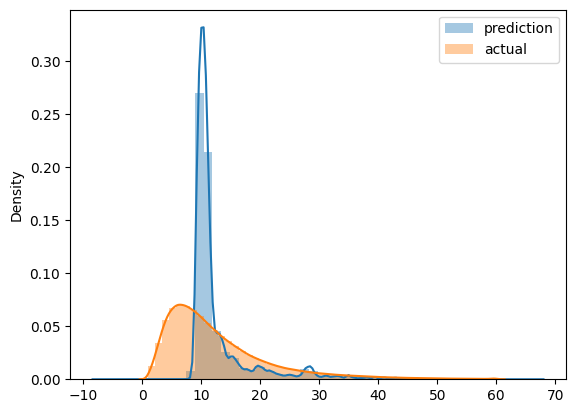

In [51]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [61]:
df_val = pd.read_parquet('../../data/yellow_tripdata_2022-02.parquet')

df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)

df_val = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]

In [62]:
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [63]:
y_val = df_val[target].values
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

14.618866430976825